# Task- Perform data cleaning and exploratory data analysis (EDA) on a dataset. Explore the relationships between variables and identify patterns and trends in the data.

# Load The Dataset

In [36]:
import pandas as pd

titanic_data = pd.read_csv('titanic_data.csv')

# Explore the Data

In [37]:
# Display the first few rows of the dataset
print(titanic_data.head())

# Get a summary of the dataset
print(titanic_data.info())

# Get descriptive statistics for numeric columns
print(titanic_data.describe())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null

# Data Cleaning

In [38]:
# Check for missing values
print(titanic_data.isnull().sum())

# Handle missing values (e.g., by imputing or dropping rows/columns)
# Example: Impute missing ages with the median age
median_age = titanic_data['age'].median()
titanic_data['age'].fillna(median_age, inplace=True)


survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64


# Data Visualization

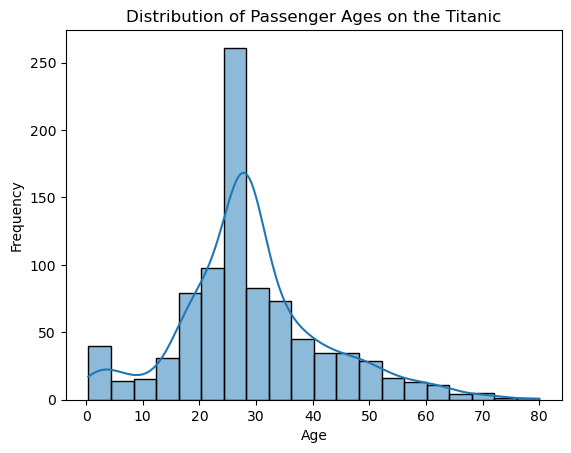

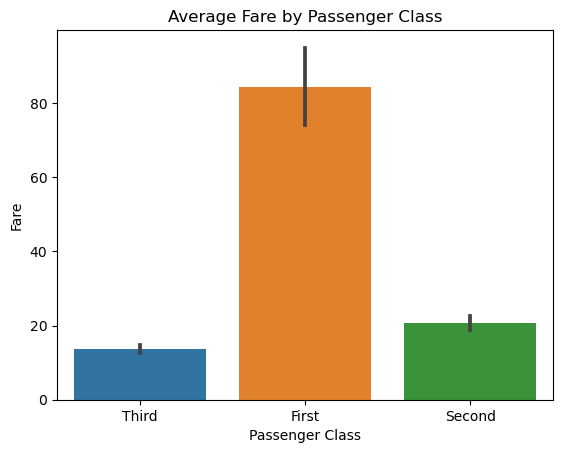

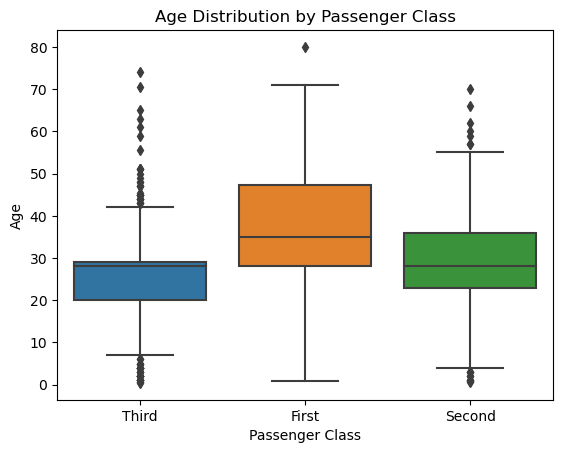

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the distribution of passenger ages
sns.histplot(titanic_data['age'], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Passenger Ages on the Titanic")
plt.show()

# Explore the relationships between variables using scatter plots, bar plots, and box plots
sns.barplot(x='class', y='fare', data=titanic_data)
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Average Fare by Passenger Class")
plt.show()

sns.boxplot(x='class', y='age', data=titanic_data)
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.title("Age Distribution by Passenger Class")
plt.show()


# Feature Engineering

In [40]:
# Create a new feature 'FamilySize' by summing 'SibSp' and 'Parch'
titanic_data['FamilySize'] = titanic_data['sibsp'] + titanic_data['parch']


# Survival Rates by Age Group, Passenger Class, Gender

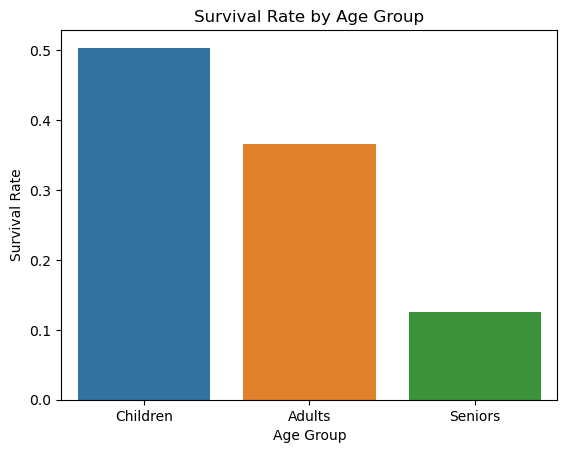

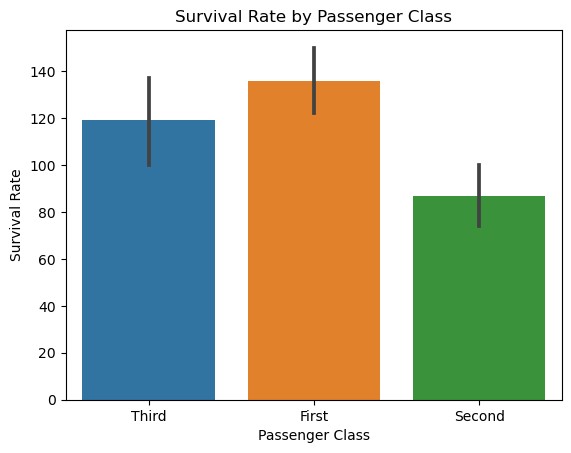

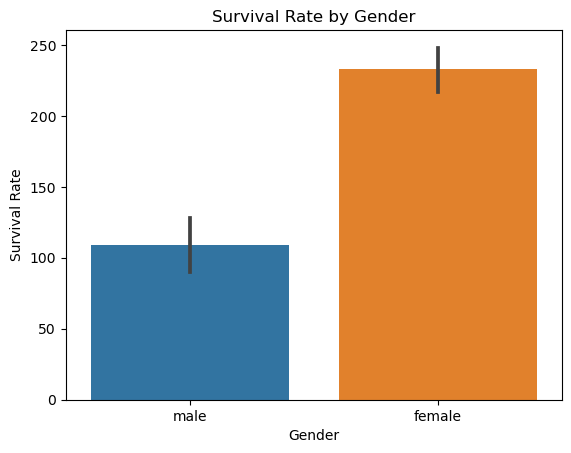

In [45]:
# Create age groups (e.g., children, adults, and seniors)
age_bins = [0, 18, 65, 100]
age_labels = ['Children', 'Adults', 'Seniors']
titanic_data['AgeGroup'] = pd.cut(titanic_data['age'], bins=age_bins, labels=age_labels)

# Calculate the survival rate for each age group
survival_rates_by_age_group = titanic_data.groupby('AgeGroup')['survived'].mean().reset_index()

# Create a bar chart
sns.barplot(x='AgeGroup', y='survived', data=survival_rates_by_age_group)
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")
plt.show()


# Explore survival rates based on passenger class
sns.barplot(x='class', y='survived', data=titanic_data, estimator=sum)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.show()

# Explore survival rates based on gender
sns.barplot(x='sex', y='survived', data=titanic_data, estimator=sum)
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()
